In [1]:
options(java.parameters = "-Xmx8g")
library(loadeR)
library(transformeR)
library(visualizeR) # spatialPlot
library(geoprocessoR)
library(climate4R.indices) # linearTrend

Loading required package: rJava



Loading required package: loadeR.java



Java version 11x amd64 by Azul Systems, Inc. detected



NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready



Loading required package: climate4R.UDG



climate4R.UDG version 0.2.3 (2021-07-05) is loaded



Get the latest stable version (0.2.4) using <devtools::install_github('SantanderMetGroup/climate4R.UDG')>



Please use 'citation("climate4R.UDG")' to cite this package.



loadeR version 1.7.1 (2021-07-05) is loaded



Please use 'citation("loadeR")' to cite this package.




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.3 (2021-08-04) is loaded



Get the latest stable version (2.1.4) using <devtools::install_github('SantanderMetGroup/transformeR')>



Please see 'citation("transformeR")' to cite this package.



visualizeR version 1.6.1 (2021-03-11) is loaded



Please see 'citation("visualizeR")' to cite this package.



geoprocessoR version 0.2.0 (2020-01-06) is loaded



Please see 'citation("geoprocessoR")' to cite this package.



climate4R.indices version 0.2.0 (2021-07-08) is loaded



Use 'indexShow()' for an overview of the available climate indices and circIndexShow() for the circulation indices.



NOTE: use package climate4R.climdex to calculate ETCCDI indices.




Attaching package: ‘climate4R.indices’




The following object is masked from ‘package:transformeR’:

    lambWT




In [2]:
library(magrittr)
library(sp)
library(RColorBrewer)
library(rgdal) # readOGR

rgdal: version: 1.5-16, (SVN revision 1050)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.1, released 2020/12/29
Path to GDAL shared files: /home/phanaur/mambaforge/envs/tfg/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.2.0, November 1st, 2020, [PJ_VERSION: 720]
Path to PROJ shared files: /home/phanaur/mambaforge/envs/tfg/share/proj
PROJ CDN enabled: TRUE
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.



In [3]:
regs <- get(load("../reference-regions/IPCC-WGI-reference-regions-v4_R.rda")) %>% as("SpatialPolygons")

In [4]:
regs.area <- c("NWN", "NEN", "WNA", "CNA","ENA","NCA") # North America regions

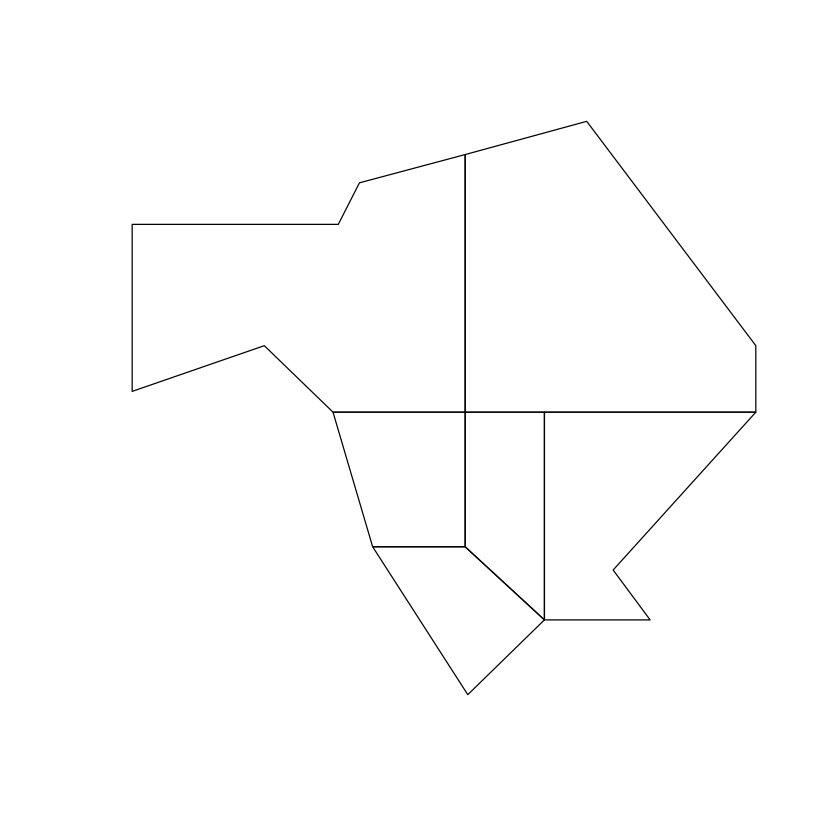

In [5]:
regs <- regs[regs.area]
plot(regs)

In [6]:
coast <- readOGR("auxiliary-material/WORLD_coastline.shp") 

OGR data source with driver: ESRI Shapefile 
Source: "/home/phanaur/github/Atlas/notebooks/auxiliary-material/WORLD_coastline.shp", layer: "WORLD_coastline"
with 127 features
It has 2 fields


In [7]:
UDG.datasets()$OBSERVATIONS

Label names are returned, set argument full.info = TRUE to get more information



[1] "WATCH_WFDEI"            "PIK_Obs-EWEMBI"         "E-OBS_v14_0.50regular" 
 [4] "E-OBS_v14_0.44rotated"  "E-OBS_v14_0.25regular"  "E-OBS_v14_0.22rotated" 
 [7] "E-OBS_v17_0.50regular"  "E-OBS_v17_0.44rotated"  "E-OBS_v17_0.25regular" 
[10] "E-OBS_v17_0.22rotated"  "E-OBS_v21e_0.10regular" "UC-Spain02_11"         
[13] "UC-Spain02_22"          "UC-Spain02_44"          "GPCCmon"               
[16] "GPCC"                   "GPCPmon"                "GPCP"                  
[19] "CRU-TS"                 "BEST"                   "BESTmon"               
[22] "W5E5"

In [8]:
lonLim <- c(168.0, -50)
latLim <- c(2.2, 85)

In [9]:
years <- 1980:2014

In [10]:
var <- "pr"

In [11]:
grid <- loadGridData("auxiliary-material/W5E5_NorthAmerica_pr_1980-2014_yearly.nc4", var = "pr")

[2022-10-13 10:08:39] Defining geo-location parameters



[2022-10-13 10:08:39] Defining time selection parameters



[2022-10-13 10:08:39] Retrieving data subset ...



[2022-10-13 10:08:40] Done



In [12]:
grid <- setGridProj(grid = grid, proj = proj4string(regs))

Warning message in proj4string(regs):
“CRS object has comment, which is lost in output”


[2022-10-13 10:08:40] - Computing climatology...



[2022-10-13 10:08:40] - Done.



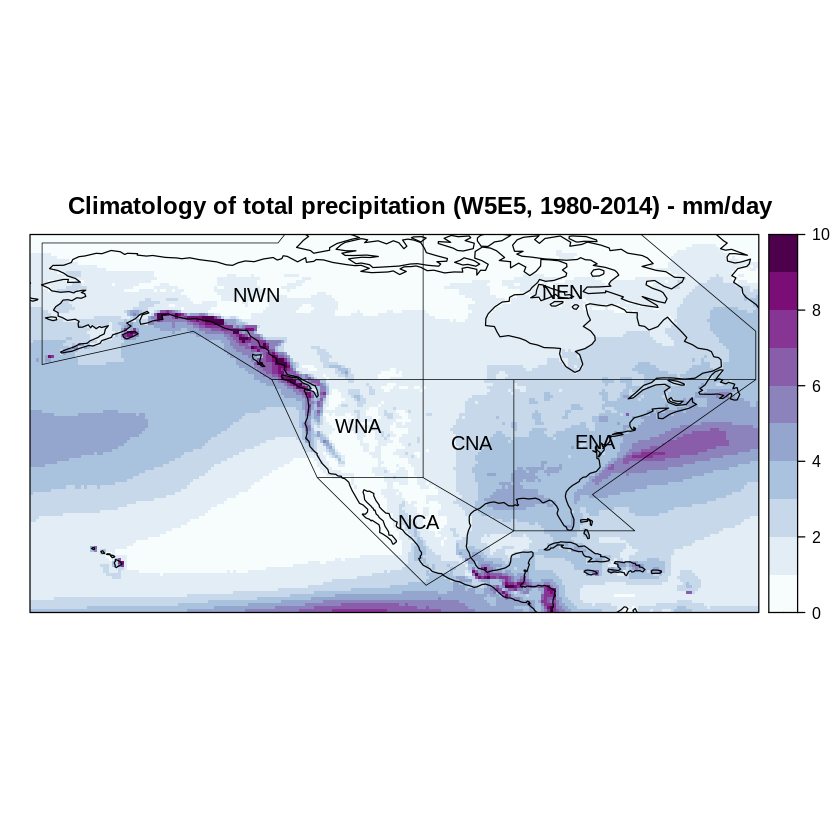

In [13]:
spatialPlot(climatology(grid),
            at = seq(0, 10, 1), 
            set.min = 0,
            set.max = 10,
            backdrop.theme = "coastline",
            col.regions = brewer.pal(n = 9, "BuPu") %>% colorRampPalette(),
            main = paste0("Climatology of total precipitation (W5E5, ", min(years), "-", max(years), ") - mm/day"),
            sp.layout = list(
                list(regs, first = FALSE, lwd = 0.6),
                list("sp.text", coordinates(regs), names(regs), first = FALSE, cex = 1)
))

In [14]:
grid %<>% overGrid(regs)

Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


[2022-10-13 10:08:40] - Computing climatology...



[2022-10-13 10:08:41] - Done.



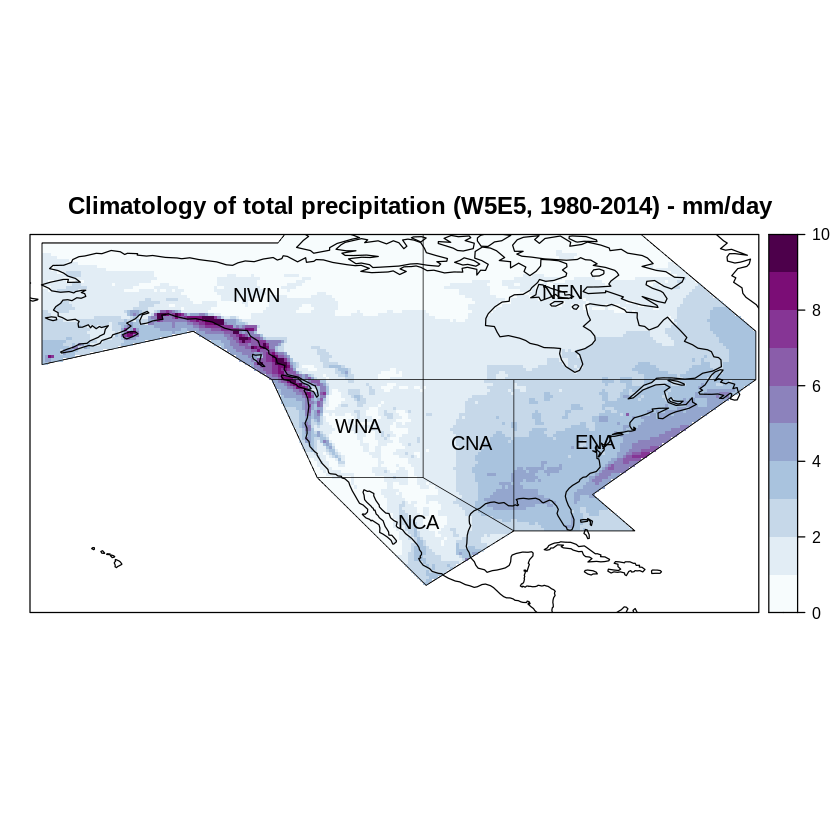

In [15]:
spatialPlot(climatology(grid),
            at = seq(0, 10, 1), 
            set.min = 0,
            set.max = 10,
            backdrop.theme = "coastline",
            col.regions = brewer.pal(n = 9, "BuPu") %>% colorRampPalette(),
            main = paste0("Climatology of total precipitation (W5E5, ", min(years), "-", max(years), ") - mm/day"),
            sp.layout = list(
                list(regs, first = FALSE, lwd = 0.6),
                list("sp.text", coordinates(regs), names(regs), first = FALSE, cex = 1)
))

In [16]:
trendGrid <- linearTrend(grid) %>% subsetGrid(var = "b")

The slope of the linear trend is estimated based on the temporal resolution of the data. Please consider using the function aggregateGrid prior to the call of linearTrend to adequate the data to your resolution of interest.



[2022-10-13 10:08:41] - Computing climatology...



[2022-10-13 10:08:41] - Done.



Warning message:
“Only one grid passed as input. Nothing was done”


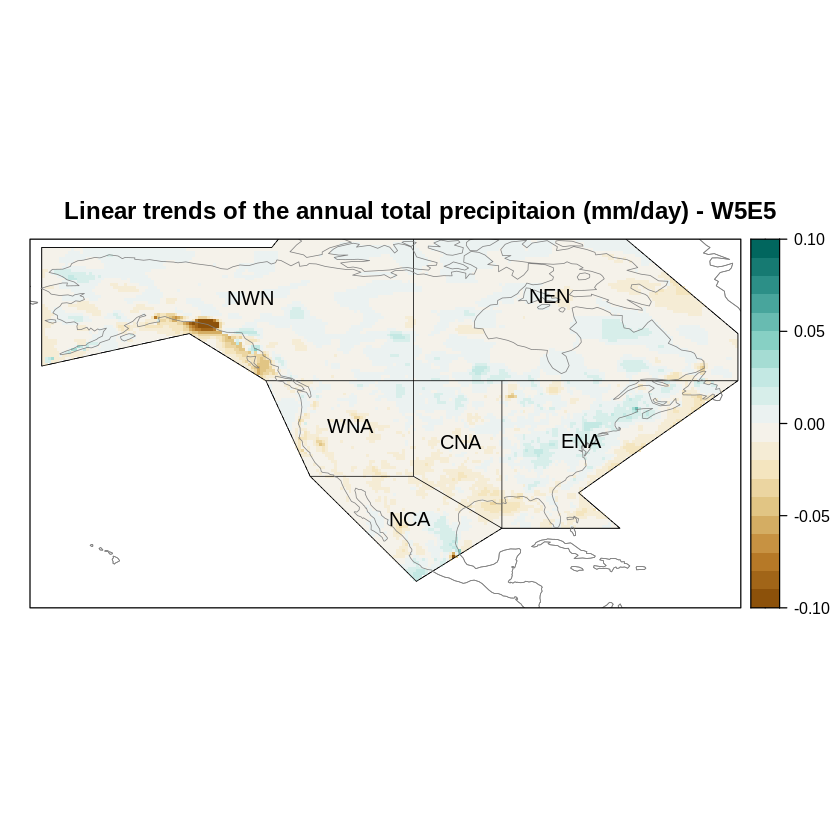

In [17]:
spatialPlot(trendGrid, 
            col.regions = brewer.pal(n = 9, "BrBG") %>% colorRampPalette(),
            at = seq(-0.1, 0.1, 0.01), 
            set.min = -0.1,
            set.max = 0.1,
            main = paste("Linear trends of the annual total precipitaion (mm/day) - W5E5"),
            sp.layout = list(  
            list(regs, first = FALSE, lwd = 0.6),
            list(coast, col = "gray50", first = FALSE, lwd = 0.6),  
            list("sp.text", coordinates(regs), names(regs), first = FALSE, cex = 1)
))

In [18]:
pvalGrid <- linearTrend(grid) %>% subsetGrid(var = "pval")
pvalGrid <- binaryGrid(pvalGrid, threshold = 0.1, condition = "GT")

The slope of the linear trend is estimated based on the temporal resolution of the data. Please consider using the function aggregateGrid prior to the call of linearTrend to adequate the data to your resolution of interest.



[2022-10-13 10:08:43] - Computing climatology...



[2022-10-13 10:08:43] - Done.



Warning message:
“Only one grid passed as input. Nothing was done”


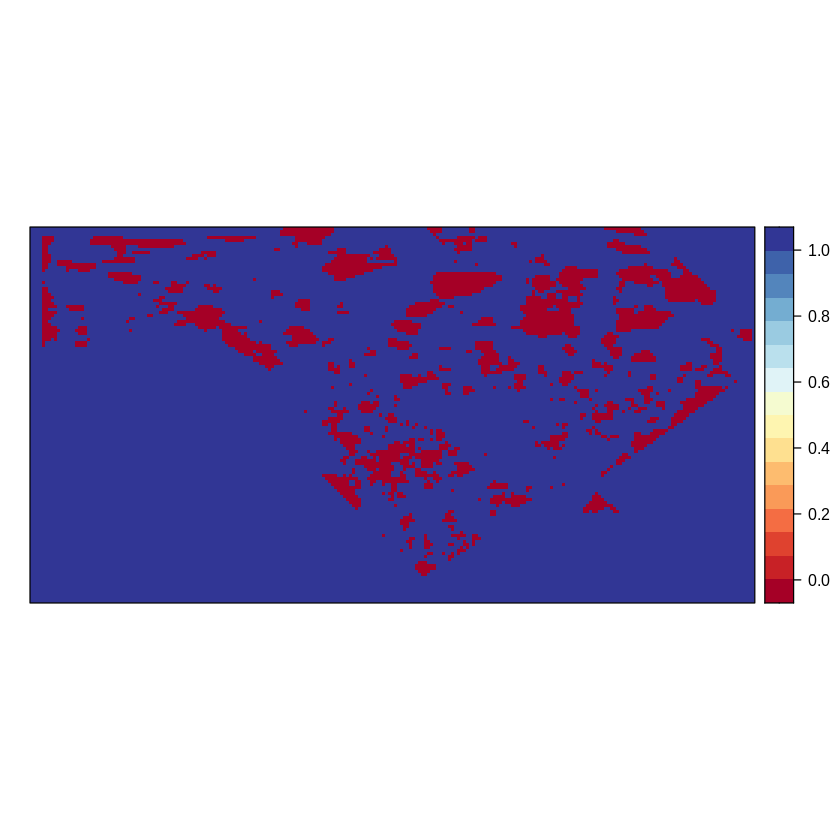

In [19]:
spatialPlot(pvalGrid)

In [20]:
mask <- binaryGrid(climatology(grid),condition = "GE", threshold = 0, values = c(NA,1))
pvalGrid <- gridArithmetics(pvalGrid, mask)

[2022-10-13 10:08:44] - Computing climatology...



[2022-10-13 10:08:44] - Done.



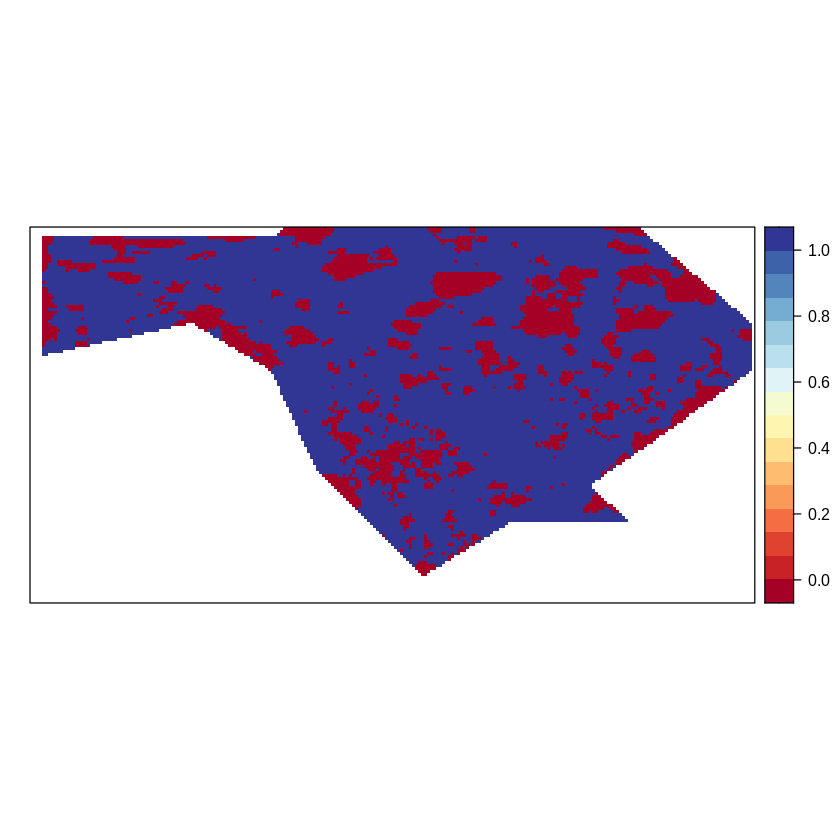

In [21]:
spatialPlot(pvalGrid)

In [22]:
hatching.lines <- lapply(c("45","-45"), FUN = function(angle) {
  c(map.hatching(clim = climatology(pvalGrid), 
                 threshold = 0.5, 
                 condition = "GE", 
                 density = 4,
                 angle = angle, coverage.percent = 50,
                 upscaling.aggr.fun = list(FUN = "mean", na.rm = TRUE)
  ), 
  "which" = 1, lwd = 0.5)
})

[2022-10-13 10:08:44] - Computing climatology...



[2022-10-13 10:08:44] - Done.



Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


[2022-10-13 10:08:45] - Computing climatology...



[2022-10-13 10:08:45] - Done.



Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


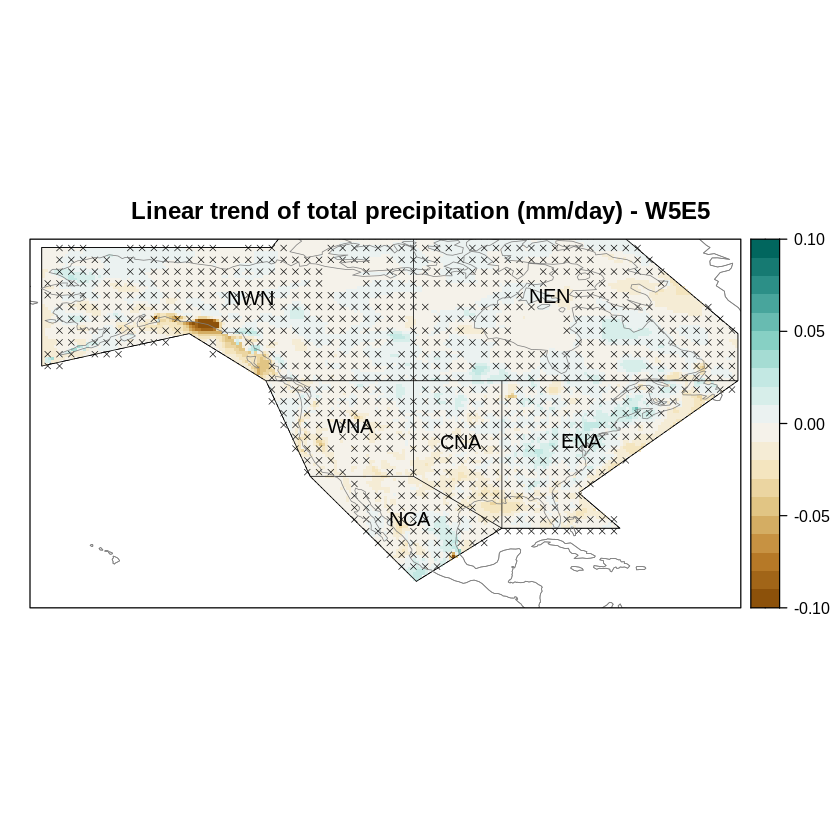

In [23]:
spatialPlot(trendGrid, 
            col.regions = brewer.pal(n = 9, "BrBG") %>% colorRampPalette(),
            at = seq(-0.1, 0.1, 0.01), 
            set.min = -0.1,
            set.max = 0.1,
            main = paste("Linear trend of total precipitation (mm/day) - W5E5"),
            sp.layout = list(
              hatching.lines[[1]],
              hatching.lines[[2]],  
              list(regs, first = FALSE, lwd = 0.6),
              list(coast, col = "gray50", first = FALSE, lwd = 0.6),  
              list("sp.text", coordinates(regs), names(regs), first = FALSE, cex = 1)
            )
)

In [24]:
grid.regs <- lapply(names(regs), function(r) overGrid(grid, regs[r]))

Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


[2022-10-13 10:08:47] - Computing climatology...



[2022-10-13 10:08:47] - Done.



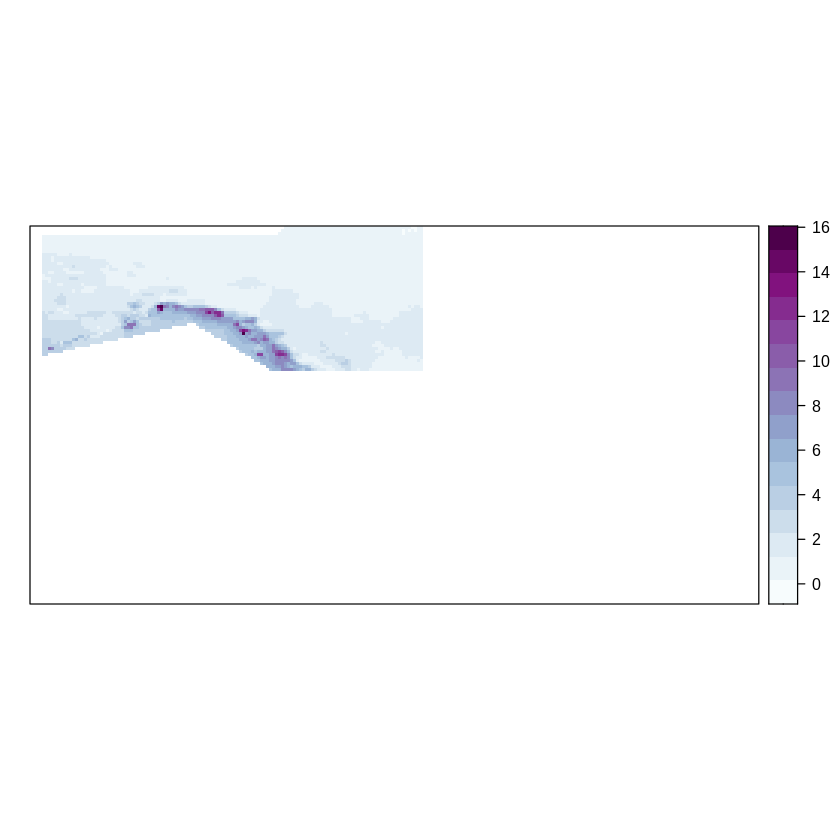

In [25]:
spatialPlot(climatology(grid.regs[["NWN"]]), 
            col.regions = brewer.pal(n = 9, "BuPu") %>% colorRampPalette()
)

In [26]:
spatial.mean <- function(grid) aggregateGrid(grid, aggr.spatial = list(FUN = "mean", na.rm = TRUE)) %>% scaleGrid(type = "center")
grid.anom <- lapply(grid.regs, spatial.mean)  

[2022-10-13 10:08:47] - Scaling ...



Calculating areal weights...



[2022-10-13 10:08:47] - Aggregating spatially...



[2022-10-13 10:08:47] - Done.



[2022-10-13 10:08:47] - Done



[2022-10-13 10:08:47] - Scaling ...



Calculating areal weights...



[2022-10-13 10:08:47] - Aggregating spatially...



[2022-10-13 10:08:47] - Done.



[2022-10-13 10:08:47] - Done



[2022-10-13 10:08:47] - Scaling ...



Calculating areal weights...



[2022-10-13 10:08:47] - Aggregating spatially...



[2022-10-13 10:08:47] - Done.



[2022-10-13 10:08:47] - Done



[2022-10-13 10:08:47] - Scaling ...



Calculating areal weights...



[2022-10-13 10:08:47] - Aggregating spatially...



[2022-10-13 10:08:47] - Done.



[2022-10-13 10:08:47] - Done



[2022-10-13 10:08:47] - Scaling ...



Calculating areal weights...



[2022-10-13 10:08:47] - Aggregating spatially...



[2022-10-13 10:08:47] - Done.



[2022-10-13 10:08:47] - Done



[2022-10-13 10:08:47] - Scaling ...



Calculating areal weights...



[2022-10-13 10:08:47] - Aggregating spatially...



[2022-10-13 10:08:47] - Done.



[2022-10-13 10:08:47] - Done



In [27]:
names(grid.anom)

[1] "NWN" "NEN" "WNA" "CNA" "ENA" "NCA"

In [28]:
trend.val <- lapply(1:length(grid.anom), FUN = function(x) {
    aux <- linearTrend(grid.anom[[x]]) %>% subsetGrid(var = "b")
    round(aux$Data[1], digits = 3)
})
names(grid.anom) <- sprintf("%s (%g mm/day/yr)", names(grid.anom), trend.val)

The slope of the linear trend is estimated based on the temporal resolution of the data. Please consider using the function aggregateGrid prior to the call of linearTrend to adequate the data to your resolution of interest.



[2022-10-13 10:08:47] - Computing climatology...



[2022-10-13 10:08:47] - Done.



Warning message:
“Only one grid passed as input. Nothing was done”


The slope of the linear trend is estimated based on the temporal resolution of the data. Please consider using the function aggregateGrid prior to the call of linearTrend to adequate the data to your resolution of interest.



[2022-10-13 10:08:47] - Computing climatology...



[2022-10-13 10:08:47] - Done.



Warning message:
“Only one grid passed as input. Nothing was done”


The slope of the linear trend is estimated based on the temporal resolution of the data. Please consider using the function aggregateGrid prior to the call of linearTrend to adequate the data to your resolution of interest.



[2022-10-13 10:08:47] - Computing climatology...



[2022-10-13 10:08:47] - Done.



Warning message:
“Only one grid passed as input. Nothing was done”


The slope of the linear trend is estimated based on the temporal resolution of the data. Please consider using the function aggregateGrid prior to the call of linearTrend to adequate the data to your resolution of interest.



[2022-10-13 10:08:47] - Computing climatology...



[2022-10-13 10:08:47] - Done.



Warning message:
“Only one grid passed as input. Nothing was done”


The slope of the linear trend is estimated based on the temporal resolution of the data. Please consider using the function aggregateGrid prior to the call of linearTrend to adequate the data to your resolution of interest.



[2022-10-13 10:08:47] - Computing climatology...



[2022-10-13 10:08:47] - Done.



Warning message:
“Only one grid passed as input. Nothing was done”


The slope of the linear trend is estimated based on the temporal resolution of the data. Please consider using the function aggregateGrid prior to the call of linearTrend to adequate the data to your resolution of interest.



[2022-10-13 10:08:47] - Computing climatology...



[2022-10-13 10:08:48] - Done.



Warning message:
“Only one grid passed as input. Nothing was done”


In [29]:
names(grid.anom)

[1] "NWN (-0.004 mm/day/yr)" "NEN (-0.001 mm/day/yr)" "WNA (-0.005 mm/day/yr)"
[4] "CNA (-0.006 mm/day/yr)" "ENA (-0.001 mm/day/yr)" "NCA (-0.003 mm/day/yr)"

pad applied on the interval: year



pad applied on the interval: year



pad applied on the interval: year



pad applied on the interval: year



pad applied on the interval: year



pad applied on the interval: year



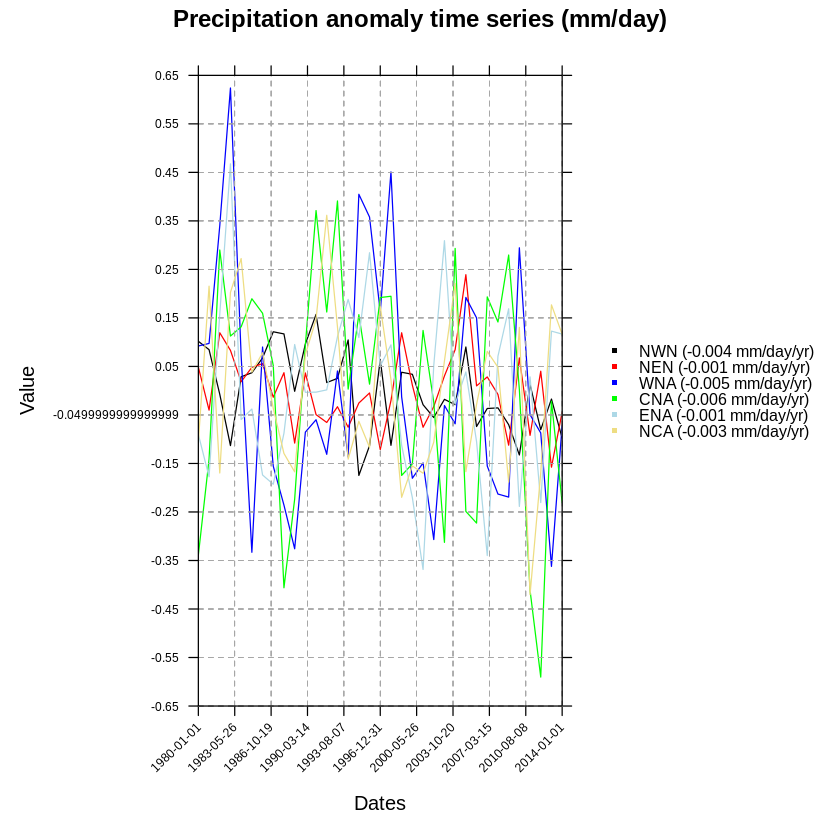

In [30]:
temporalPlot(grid.anom,
               xyplot.custom = list(
                 main = "Precipitation anomaly time series (mm/day)", ylim=c(-0.65, 0.65)
               ))      

In [31]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Fedora Linux 36 (Workstation Edition)

Matrix products: default
BLAS/LAPACK: /home/phanaur/mambaforge/envs/tfg/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=es_ES.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=es_ES.UTF-8           LC_COLLATE=es_ES.UTF-8       
 [5] LC_MONETARY=es_ES.UTF-8       LC_MESSAGES=es_ES.UTF-8      
 [7] LC_PAPER=es_ES.UTF-8          LC_NAME=es_ES.UTF-8          
 [9] LC_ADDRESS=es_ES.UTF-8        LC_TELEPHONE=es_ES.UTF-8     
[11] LC_MEASUREMENT=es_ES.UTF-8    LC_IDENTIFICATION=es_ES.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] rgdal_1.5-16            RColorBrewer_1.1-2      sp_1.4-5               
 [4] magrittr_2.0.1          climate4R.indices_0.2.0 geoprocessoR_0.2.0     
 [7] visualizeR_1.6.1        transformeR_2.1.3       loadeR_1.7.1           
[10] climate4R.UDG_0